In [25]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-symptoms-checker/Cleaned-Data.csv
/kaggle/input/covid19-symptoms-checker/Raw-Data.csv
/kaggle/input/corona/corona1.csv
/kaggle/input/corona-update/corona1.csv


In [35]:
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
plt.style.use('seaborn-whitegrid')

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv


In [36]:
df = pd.read_csv("../input/corona/corona1.csv")

In [37]:
df.head()

,fever,bodyPain,age,runnyNose,Moderate_severe_cough,infectionProb,Gender,Dry_Cough,Sore_throat,Weakness,Change_in_Appetite,Feeling_breathless,close_contact,Diabetes,heart_dis,progressin48hr,kidneydis
0,100.434943,1,29,0,0,0,1,1,0,1,1,0,0,0,0,0,0
1,101.774785,1,70,0,0,1,1,0,0,1,1,1,1,0,1,0,0
2,101.330944,1,53,0,1,1,2,1,0,0,1,1,1,0,1,1,1
3,98.959895,1,100,0,1,0,0,0,0,1,1,0,0,1,0,1,0
4,98.433950,0,28,0,1,0,2,0,0,1,1,0,1,0,0,0,0


In [38]:
df.shape

(2543, 17)

In [39]:
df.drop(columns=["Gender","progressin48hr"],inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2543 entries, 0 to 2542
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fever                  2543 non-null   float64
 1   bodyPain               2543 non-null   int64  
 2   age                    2543 non-null   int64  
 3   runnyNose              2543 non-null   int64  
 4   Moderate_severe_cough  2543 non-null   int64  
 5   infectionProb          2543 non-null   int64  
 6   Dry_Cough              2543 non-null   int64  
 7   Sore_throat            2543 non-null   int64  
 8   Weakness               2543 non-null   int64  
 9   Change_in_Appetite     2543 non-null   int64  
 10  Feeling_breathless     2543 non-null   int64  
 11  close_contact          2543 non-null   int64  
 12  Diabetes               2543 non-null   int64  
 13  heart_dis              2543 non-null   int64  
 14  kidneydis              2543 non-null   int64  
dtypes: f

In [41]:
df.isnull().sum()

fever                    0
bodyPain                 0
age                      0
runnyNose                0
Moderate_severe_cough    0
infectionProb            0
Dry_Cough                0
Sore_throat              0
Weakness                 0
Change_in_Appetite       0
Feeling_breathless       0
close_contact            0
Diabetes                 0
heart_dis                0
kidneydis                0
dtype: int64

In [42]:
df.shape,dataset.shape

((2543, 15), (2543, 15))

(array([122., 121., 113., 142., 137., 127., 121., 121., 144., 113., 103.,
        126., 134., 143., 133., 130., 107., 128., 127., 151.]),
 array([  0.,   5.,  10.,  15.,  20.,  25.,  30.,  35.,  40.,  45.,  50.,
         55.,  60.,  65.,  70.,  75.,  80.,  85.,  90.,  95., 100.]),
 <a list of 20 Patch objects>)

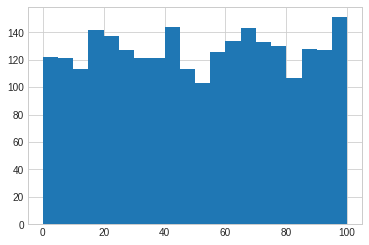

In [44]:
plt.hist(data=df,x="age",bins=20)

(array([121., 127., 126., 125., 142., 123., 128., 135., 120., 133., 141.,
        139., 120., 112., 123., 125., 119., 131., 130., 123.]),
 array([ 98.00097039,  98.20083375,  98.4006971 ,  98.60056046,
         98.80042381,  99.00028717,  99.20015052,  99.40001388,
         99.59987723,  99.79974059,  99.99960395, 100.1994673 ,
        100.39933066, 100.59919401, 100.79905737, 100.99892072,
        101.19878408, 101.39864743, 101.59851079, 101.79837414,
        101.9982375 ]),
 <a list of 20 Patch objects>)

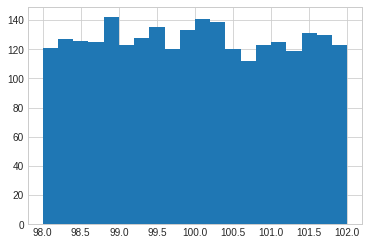

In [45]:
plt.hist(data=df,x="fever",bins=20)

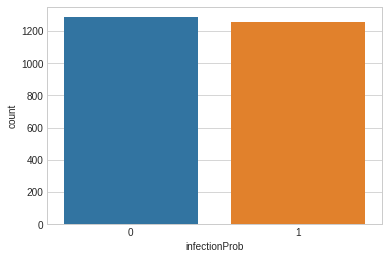

In [46]:
sns.countplot(data=df,x='infectionProb')

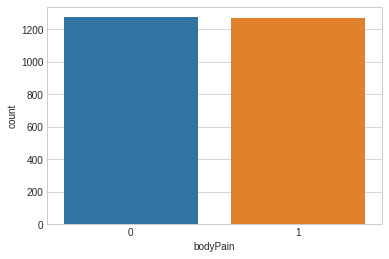

In [47]:
sns.countplot(data=df,x="bodyPain")

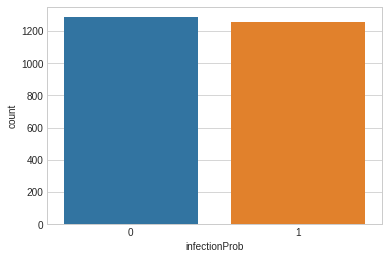

In [48]:
sns.countplot(data=df,x="infectionProb")

## Machine learning

In [49]:
X = df.drop('infectionProb', axis=1) 
y = df.infectionProb

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
X_train.shape


(2034, 14)

In [52]:
def fit_ml_algo(algo, X_train, y_train, cv):
    
    # One Pass
    model = algo.fit(X_train, y_train)
    acc = round(model.score(X_train, y_train) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Running the models

In [53]:
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X_train, 
                                                               y_train, 
                                                                    10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)

Accuracy: 52.46
Accuracy CV 10-Fold: 49.21


In [54]:
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X_train, 
                                                  y_train, 
                                                  10)

print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 69.22
Accuracy CV 10-Fold: 49.8


In [55]:
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X_train, 
                                                                      y_train, 
                                                                           10)

print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)

Accuracy: 53.0
Accuracy CV 10-Fold: 50.1


In [56]:
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X_train, 
                                                                y_train, 
                                                                10)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 50.05
Accuracy CV 10-Fold: 49.71


In [57]:
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X_train, 
                                                                y_train,
                                                                10)

print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 100.0
Accuracy CV 10-Fold: 49.75


KNeighborsClassifier()

In [58]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [59]:
def feature_importance(model, data):
    """
    Function to show which features are most important in the model.
    ::param_model:: Which model to use?
    ::param_data:: What data to use?
    """
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(20, 10))
    return fea_imp

,imp,col
5,0.021968,Dry_Cough
6,0.023183,Sore_throat
3,0.024525,runnyNose
1,0.026941,bodyPain
9,0.030469,Feeling_breathless
7,0.032475,Weakness
11,0.034865,Diabetes
13,0.037193,kidneydis
10,0.038795,close_contact
4,0.042023,Moderate_severe_cough


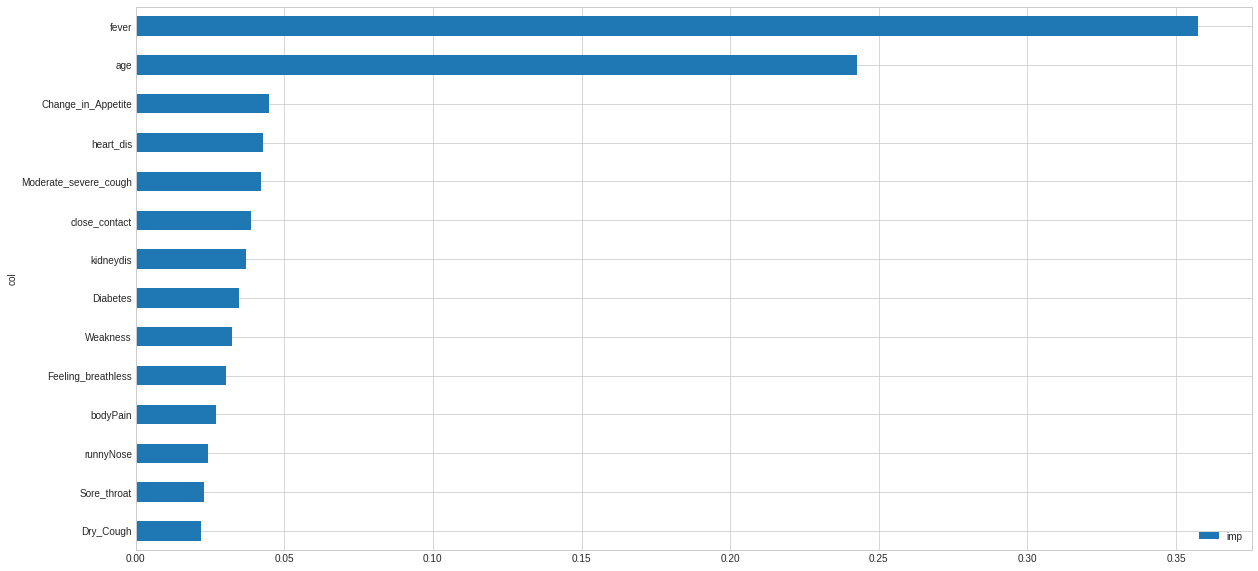

In [60]:
feature_importance(dt_model, X_train)


In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 40)

In [64]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=13, activation='relu'))
tf.keras.layers.Dropout(0.3)

ann.add(tf.keras.layers.Dense(units=13, activation='relu'))
tf.keras.layers.Dropout(0.3)

ann.add(tf.keras.layers.Dense(units=13, activation='relu'))
tf.keras.layers.Dropout(0.3)

ann.add(tf.keras.layers.Dense(units=13, activation='relu'))
tf.keras.layers.Dropout(0.3)

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [65]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, batch_size = 32, epochs =300)

ann.evaluate(X_test,y_test)

Epoch 1/300
56/56 [==============================] - 0s 909us/step - loss: 0.6940 - accuracy: 0.5140
Epoch 2/300
56/56 [==============================] - 0s 866us/step - loss: 0.6906 - accuracy: 0.5270
Epoch 3/300
56/56 [==============================] - 0s 911us/step - loss: 0.6882 - accuracy: 0.5539
Epoch 4/300
56/56 [==============================] - 0s 942us/step - loss: 0.6871 - accuracy: 0.5534
Epoch 5/300
56/56 [==============================] - 0s 936us/step - loss: 0.6855 - accuracy: 0.5584
Epoch 6/300
56/56 [==============================] - 0s 990us/step - loss: 0.6840 - accuracy: 0.5719
Epoch 7/300
56/56 [==============================] - 0s 975us/step - loss: 0.6824 - accuracy: 0.5719
Epoch 8/300
56/56 [==============================] - 0s 931us/step - loss: 0.6808 - accuracy: 0.5719
Epoch 9/300
56/56 [==============================] - 0s 967us/step - loss: 0.6794 - accuracy: 0.5770
Epoch 10/300
56/56 [==============================] - 0s 955us/step - loss: 0.6776 - accura

56/56 [==============================] - 0s 1ms/step - loss: 0.5560 - accuracy: 0.7281
Epoch 82/300
56/56 [==============================] - 0s 1ms/step - loss: 0.5541 - accuracy: 0.7258
Epoch 83/300
56/56 [==============================] - 0s 950us/step - loss: 0.5527 - accuracy: 0.7331
Epoch 84/300
56/56 [==============================] - 0s 953us/step - loss: 0.5537 - accuracy: 0.7287
Epoch 85/300
56/56 [==============================] - 0s 956us/step - loss: 0.5507 - accuracy: 0.7320
Epoch 86/300
56/56 [==============================] - 0s 948us/step - loss: 0.5489 - accuracy: 0.7270
Epoch 87/300
56/56 [==============================] - 0s 963us/step - loss: 0.5458 - accuracy: 0.7382
Epoch 88/300
56/56 [==============================] - 0s 949us/step - loss: 0.5477 - accuracy: 0.7337
Epoch 89/300
56/56 [==============================] - 0s 979us/step - loss: 0.5456 - accuracy: 0.7382
Epoch 90/300
56/56 [==============================] - 0s 962us/step - loss: 0.5429 - accuracy: 0.74

Epoch 161/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4765 - accuracy: 0.7809
Epoch 162/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4799 - accuracy: 0.7725
Epoch 163/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7803
Epoch 164/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4773 - accuracy: 0.7742
Epoch 165/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4747 - accuracy: 0.7775
Epoch 166/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.7809
Epoch 167/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4755 - accuracy: 0.7663
Epoch 168/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4743 - accuracy: 0.7719
Epoch 169/300
56/56 [==============================] - 0s 963us/step - loss: 0.4726 - accuracy: 0.7781
Epoch 170/300
56/56 [==============================] - 0s 976us/step - loss: 0.4716 - acc

56/56 [==============================] - 0s 1ms/step - loss: 0.4252 - accuracy: 0.8017
Epoch 242/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.7955
Epoch 243/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4250 - accuracy: 0.7944
Epoch 244/300
56/56 [==============================] - 0s 992us/step - loss: 0.4261 - accuracy: 0.8011
Epoch 245/300
56/56 [==============================] - 0s 988us/step - loss: 0.4253 - accuracy: 0.7966
Epoch 246/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8022
Epoch 247/300
56/56 [==============================] - 0s 989us/step - loss: 0.4232 - accuracy: 0.8022
Epoch 248/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4231 - accuracy: 0.8096
Epoch 249/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8067
Epoch 250/300
56/56 [==============================] - 0s 1ms/step - loss: 0.4241 - accuracy: 0.802

[1.2300552129745483, 0.5072084069252014]

In [66]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

In [67]:
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [